### Questions & Answers

### Q1: Basic Statistics Calculation

Question: Calculate mean, median, mode, and variance of sepal length from iris dataset.

In [194]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import seaborn as sns

In [195]:
# Load datasets
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

In [196]:
#iris

In [197]:
sepal_length = iris.data[:, 0]

In [198]:
sepal_length

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [199]:
round(sepal_length.mean(), 2)


np.float64(5.84)

In [200]:
sepal_length.mean()

np.float64(5.843333333333334)

In [201]:
iris = load_iris()
sepal_length = iris.data[:, 0]

# Convert to pandas Series for easy mode calculation
sepal_series = pd.Series(sepal_length)

mean = sepal_series.mean()
median = sepal_series.median()
mode = sepal_series.mode()[0]  # Get first mode value
variance = sepal_series.var()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Variance: {variance:.2f}")

Mean: 5.84
Median: 5.80
Mode: 5.00
Variance: 0.69


(array([0.13888889, 0.16666667, 0.58333333, 0.36111111, 0.19444444,
        0.58333333, 0.27777778, 0.44444444, 0.44444444, 0.19444444,
        0.41666667, 0.05555556, 0.13888889, 0.02777778, 0.13888889]),
 array([4.3 , 4.54, 4.78, 5.02, 5.26, 5.5 , 5.74, 5.98, 6.22, 6.46, 6.7 ,
        6.94, 7.18, 7.42, 7.66, 7.9 ]),
 <BarContainer object of 15 artists>)

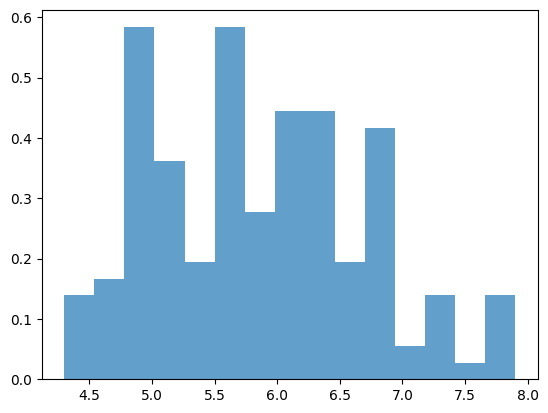

In [202]:
plt.hist(sepal_length, bins=15, density=True, alpha=0.7)

### Q2(a): Normal Distribution Analysis
Question: Using the iris dataset, test if the sepal length follows a normal distribution using Shapiro-Wilk test and calculate the probability that a sepal length is greater than 6.5 cm.

In [203]:
from scipy.stats import shapiro, norm

In [204]:
sepal_length = iris.data[:, 0]
stat, p_value = shapiro(sepal_length)
mean, std = np.mean(sepal_length), np.std(sepal_length)
prob_gt_65 = 1 - norm.cdf(6.5, mean, std)

print(f"Shapiro-Wilk p-value: {p_value:.4f}")
print(f"P(Sepal Length > 6.5): {prob_gt_65:.4f}")

Shapiro-Wilk p-value: 0.0102
P(Sepal Length > 6.5): 0.2131


### The Hypothesis Being Tested:

#### Null Hypothesis (H₀): The data comes from a normal distribution
#### Alternative Hypothesis (H₁): The data does NOT come from a normal distribution

In [205]:
p_value = 0.0102
alpha = 0.05

if p_value < alpha:
    print("Reject Null Hypothesis: Data is NOT normally distributed")
else:
    print("Fail to reject Null Hypothesis: Data appears normal")

Reject Null Hypothesis: Data is NOT normally distributed


### Q2(b) : Normal Distribution Probability

Question: If sepal length follows normal distribution with mean=5.8 and std=0.8,
find probability that length is between 5 and 6 cm.

In [206]:
from scipy.stats import norm

mean, std = 5.8, 0.8
prob = norm.cdf(6, mean, std) - norm.cdf(5, mean, std)
print(f"P(5 < Length < 6): {prob:.4f}")

P(5 < Length < 6): 0.4401


### Q3(a): Binomial Distribution - Coin Toss

Question: If you toss a fair coin 10 times, what's the probability of getting exactly 7 heads?

In [207]:
from scipy.stats import binom

In [208]:
n, p = 10, 0.5
prob_7_heads = binom.pmf(7, n, p)
print(f"P(7 heads in 10 tosses): {prob_7_heads:.4f}")

P(7 heads in 10 tosses): 0.1172


### Q3(b): Binomial Distribution - Classification Accuracy
Question: In the breast cancer dataset, if a model has 95% accuracy, what's the probability that it correctly classifies at least 28 out of 30 randomly selected samples?

In [209]:
from scipy.stats import binom

In [210]:
n_trials = 30
success_prob = 0.95
prob_at_least_28 = sum(binom.pmf(k, n_trials, success_prob) for k in range(28, n_trials+1))

print(f"P(at least 28 correct): {prob_at_least_28:.4f}")

P(at least 28 correct): 0.8122


### Q4(a): Poisson Distribution - Customer Arrival

Question: If customers arrive at a rate of 4 per hour, what's the probability exactly 6 customers arrive in next hour?

In [211]:
from scipy.stats import poisson

In [212]:
rate = 4
prob_6_customers = poisson.pmf(6, rate)
print(f"P(6 customers): {prob_6_customers:.4f}")

P(6 customers): 0.1042


### Q4(b): Poisson Distribution - Rare Events
Question: If wine quality defects occur with a rate of 0.8 defects per batch, what's the probability of finding exactly 2 defects in a batch? Also calculate P(X ≤ 3).

In [213]:
rate = 0.8
prob_exactly_2 = poisson.pmf(2, rate)
prob_leq_3 = poisson.cdf(3, rate)

print(f"P(exactly 2 defects): {prob_exactly_2:.4f}")
print(f"P(≤3 defects): {prob_leq_3:.4f}")

P(exactly 2 defects): 0.1438
P(≤3 defects): 0.9909


### Q5: Simple T-Test
Question: Compare mean sepal length of first 50 flowers vs last 50 flowers using t-test.

In [214]:
from scipy.stats import ttest_ind

In [215]:
group1 = sepal_series[0:50]  # First 50
group2 = sepal_series[100:150]  # last 50

t_stat, p_value = ttest_ind(group1, group1)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-statistic: 0.00, P-value: 1.0000


In [216]:
group1.mean()

np.float64(5.006)

In [217]:
group2.mean()

np.float64(6.587999999999998)

## It represents the effect size - how different the groups are relative to their variability

### Rule of thumb for T-statistic magnitude:

|t| < 2: Weak evidence

2 < |t| < 3: Moderate evidence

|t| > 3: Strong evidence

|t| > 10: Very strong evidence

### P-value means:

The probability of seeing this result by random chance is extremely small (< 0.01%)

This is highly statistically significant

### Q5(b): Hypothesis Testing - T-Test
Question: Test if there's a significant difference in mean alcohol content between wine class 1 and class 2 using an independent t-test.

In [218]:
from scipy.stats import ttest_ind

In [219]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['class'] = wine.target

class1_alc = wine_df[wine_df['class'] == 1]['alcohol']
class2_alc = wine_df[wine_df['class'] == 2]['alcohol']

t_stat, p_value = ttest_ind(class1_alc, class2_alc)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: -8.7547, P-value: 0.0000


### Q6: Confidence Interval
Question: Calculate 90% confidence interval for mean petal width.

In [220]:

petal_width = iris.data[:, 3]
n = len(petal_width)
mean = np.mean(petal_width)
std_err = stats.sem(petal_width)

ci = stats.t.interval(0.90, n-1, loc=mean, scale=std_err)
print(f"90% CI: ({ci[0]:.3f}, {ci[1]:.3f})")

90% CI: (1.096, 1.302)


In [221]:
print('mean:', round(mean, 3), 'std_err:', round(std_err, 3))

mean: 1.199 std_err: 0.062


### Q6(b): Confidence Intervals
Question: Calculate the 95% confidence interval for the mean petal width in the iris dataset.

In [222]:
petal_width = iris.data[:, 3]
n = len(petal_width)
mean = np.mean(petal_width)
std_err = stats.sem(petal_width)
ci = stats.t.interval(0.95, n-1, loc=mean, scale=std_err)

print(f"95% CI: ({ci[0]:.4f}, {ci[1]:.4f})")

95% CI: (1.0764, 1.3223)


### Q6(c): Outlier Detection using Z-score
Question: Identify outliers in iris petal length using Z-score method (threshold ±2.5σ).

In [223]:
petal_length = iris.data[:, 2]
z_scores = np.abs(stats.zscore(petal_length))
outliers = petal_length[z_scores > 2.5]

print(f"Outliers: {outliers}")
print(f"Number of outliers: {len(outliers)}")

Outliers: []
Number of outliers: 0


### Q7(a): Basic Box Plot Comparison
Question: Create a box plot comparing sepal length across the three iris species. Which species has the largest median sepal length?

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load and prepare data
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species_name'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

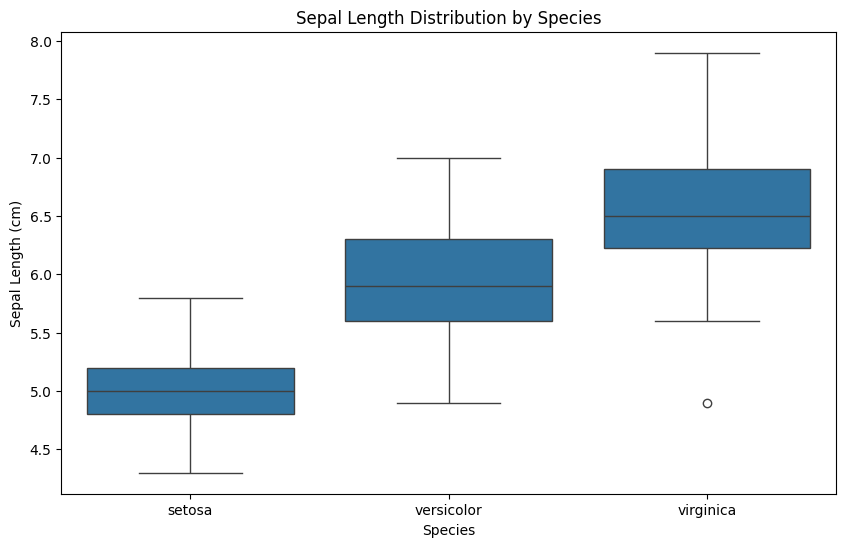

Median Sepal Lengths:
species_name
setosa        5.0
versicolor    5.9
virginica     6.5
Name: sepal length (cm), dtype: float64
Species with largest median: virginica


In [225]:
# Answer
plt.figure(figsize=(10, 6))
sns.boxplot(x='species_name', y='sepal length (cm)', data=iris_df)
plt.title('Sepal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

# Interpretation
median_sepal_lengths = iris_df.groupby('species_name')['sepal length (cm)'].median()
print("Median Sepal Lengths:")
print(median_sepal_lengths)
print(f"Species with largest median: {median_sepal_lengths.idxmax()}")

### Q7(b): Data Visualization with Distribution
Question: Plot histogram of sepal length with normal distribution curve.

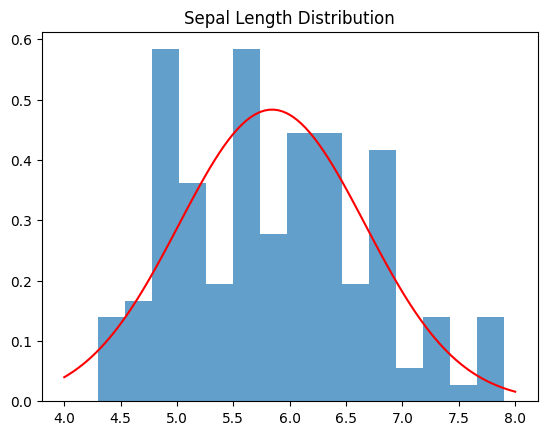

In [226]:
sepal_length = iris.data[:, 0]
plt.hist(sepal_length, bins=15, density=True, alpha=0.7)

# Add normal curve
x = np.linspace(4, 8, 100)
mean, std = np.mean(sepal_length), np.std(sepal_length)
plt.plot(x, stats.norm.pdf(x, mean, std), 'r-')
plt.title('Sepal Length Distribution')
plt.show()

### Q7(c): Correlation Heatmap
Question: Create a correlation heatmap for all four numerical features. Which two features have the strongest positive correlation?

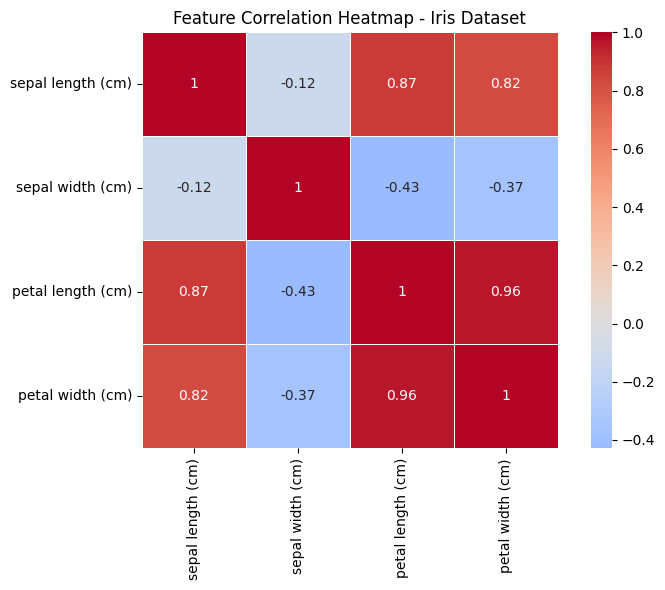

Strongest correlation: ('petal length (cm)', 'petal width (cm)') = 0.963


In [227]:
plt.figure(figsize=(8, 6))
correlation_matrix = iris_df.iloc[:, :4].corr()

# Create heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap - Iris Dataset')
plt.tight_layout()
plt.show()

# Find strongest correlation (excluding diagonal)
correlation_matrix_no_diag = correlation_matrix.copy()
np.fill_diagonal(correlation_matrix_no_diag.values, 0)
max_corr = correlation_matrix_no_diag.stack().idxmax()
print(f"Strongest correlation: {max_corr} = {correlation_matrix.loc[max_corr]:.3f}")

### Q7(d): Pair Plot with Species Differentiation
Question: Create a pair plot that shows relationships between all features, colored by species. What patterns do you observe for setosa species?

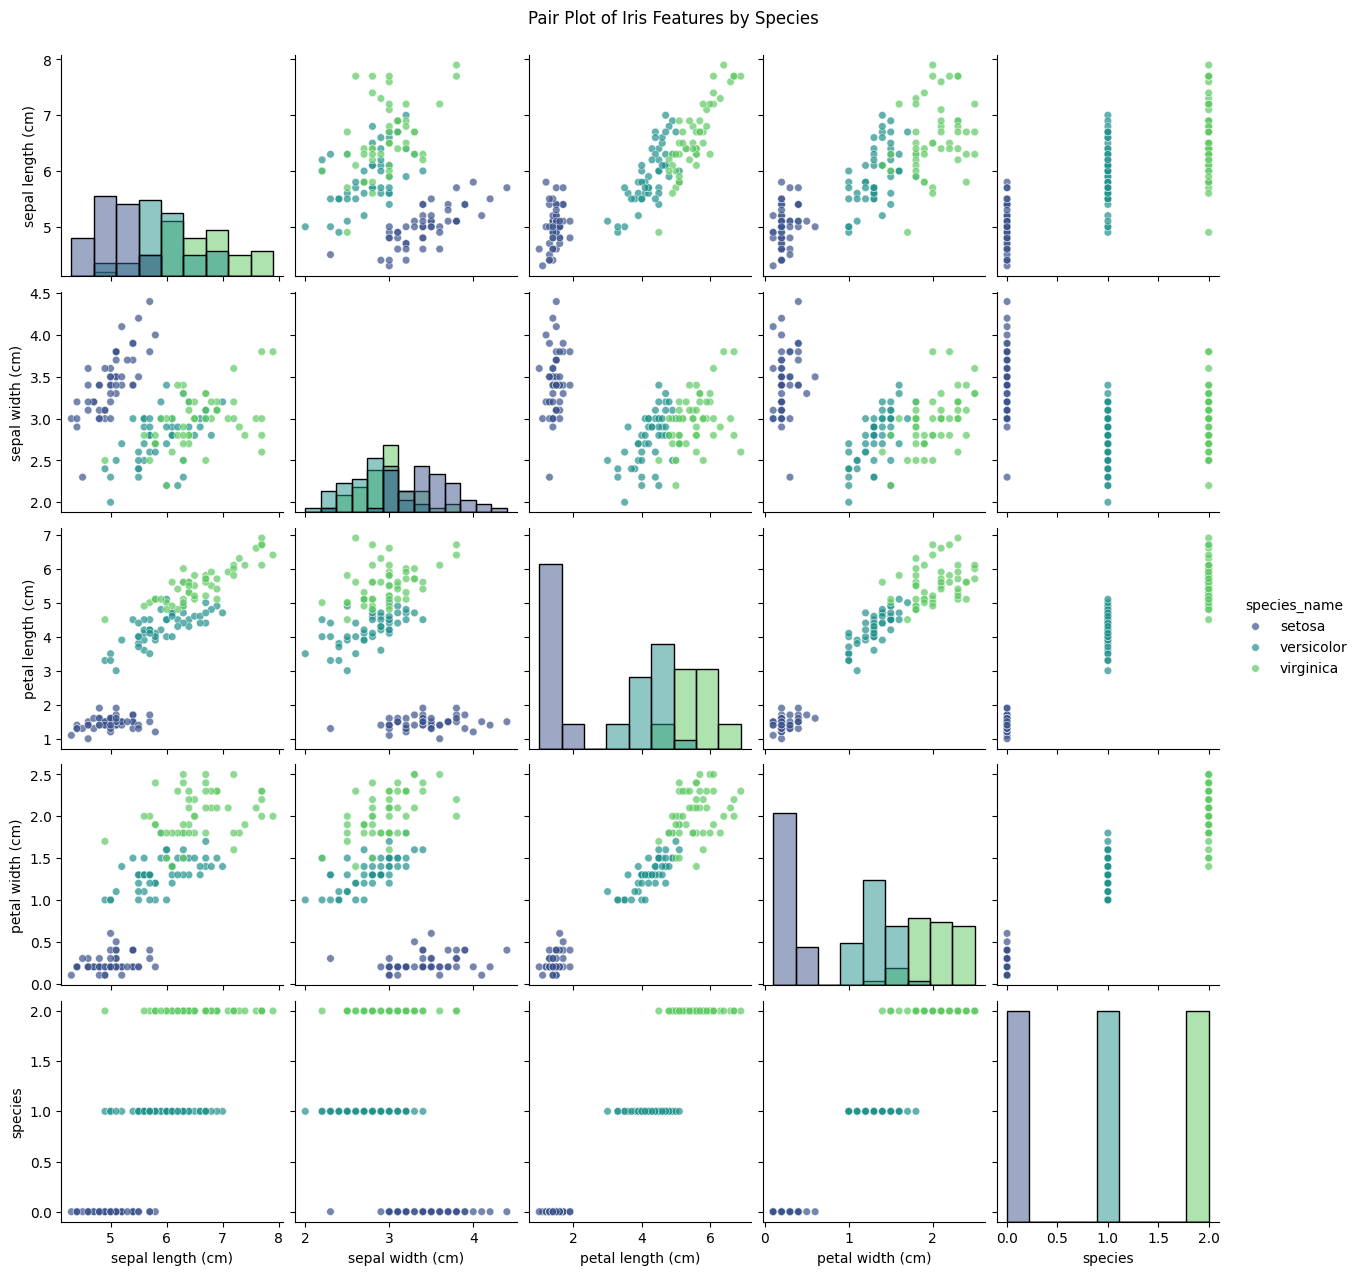

Patterns observed:
- Setosa has distinctly smaller petal measurements
- Versicolor and Virginica show more overlap
- Petal length vs petal width shows clear separation


In [228]:
pair_plot = sns.pairplot(iris_df, hue='species_name', 
                         diag_kind='hist', palette='viridis',
                         plot_kws={'alpha': 0.7, 's': 30})
pair_plot.fig.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()

# Interpretation
print("Patterns observed:")
print("- Setosa has distinctly smaller petal measurements")
print("- Versicolor and Virginica show more overlap")
print("- Petal length vs petal width shows clear separation")

### Q7(e): Violin Plot with Swarm Plot Overlay
Question: Create a violin plot for petal width with swarm plot overlay to show individual data points. Which species has the most variability in petal width?

C:\Users\DELL\AppData\Local\Temp\ipykernel_16036\1265632731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='species_name', y='petal width (cm)',


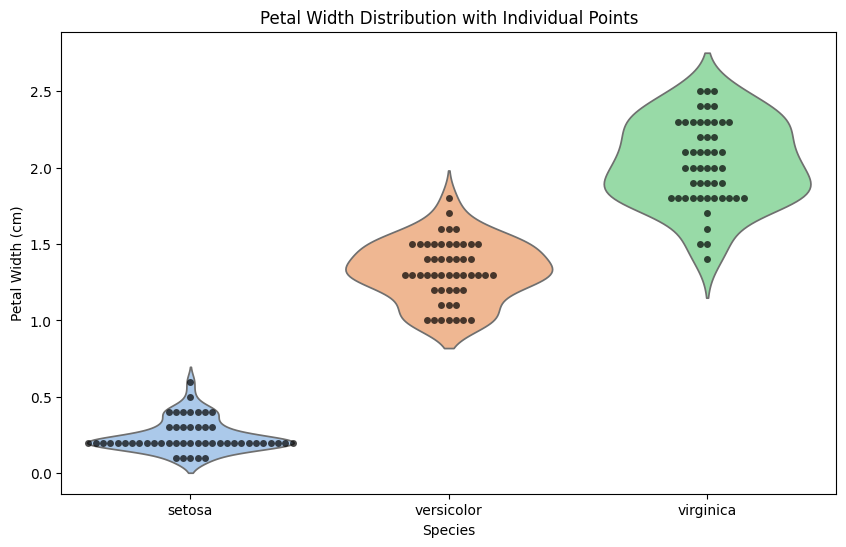

Petal Width Variability (Standard Deviation):
species_name
setosa        0.105386
versicolor    0.197753
virginica     0.274650
Name: petal width (cm), dtype: float64
Species with most variability: virginica


In [229]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='species_name', y='petal width (cm)', 
                   data=iris_df, inner=None, palette='pastel')
sns.swarmplot(x='species_name', y='petal width (cm)', 
             data=iris_df, color='black', alpha=0.7, ax=ax)
plt.title('Petal Width Distribution with Individual Points')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

# Calculate variability (standard deviation)
variability = iris_df.groupby('species_name')['petal width (cm)'].std()
print("Petal Width Variability (Standard Deviation):")
print(variability)
print(f"Species with most variability: {variability.idxmax()}")

### Q7(f): Custom Subplot Grid
Question: Create a 2x2 grid of subplots showing:

Histogram of sepal length

Scatter plot of petal length vs petal width

Box plot of sepal width by species

Line plot showing mean values for each feature by species

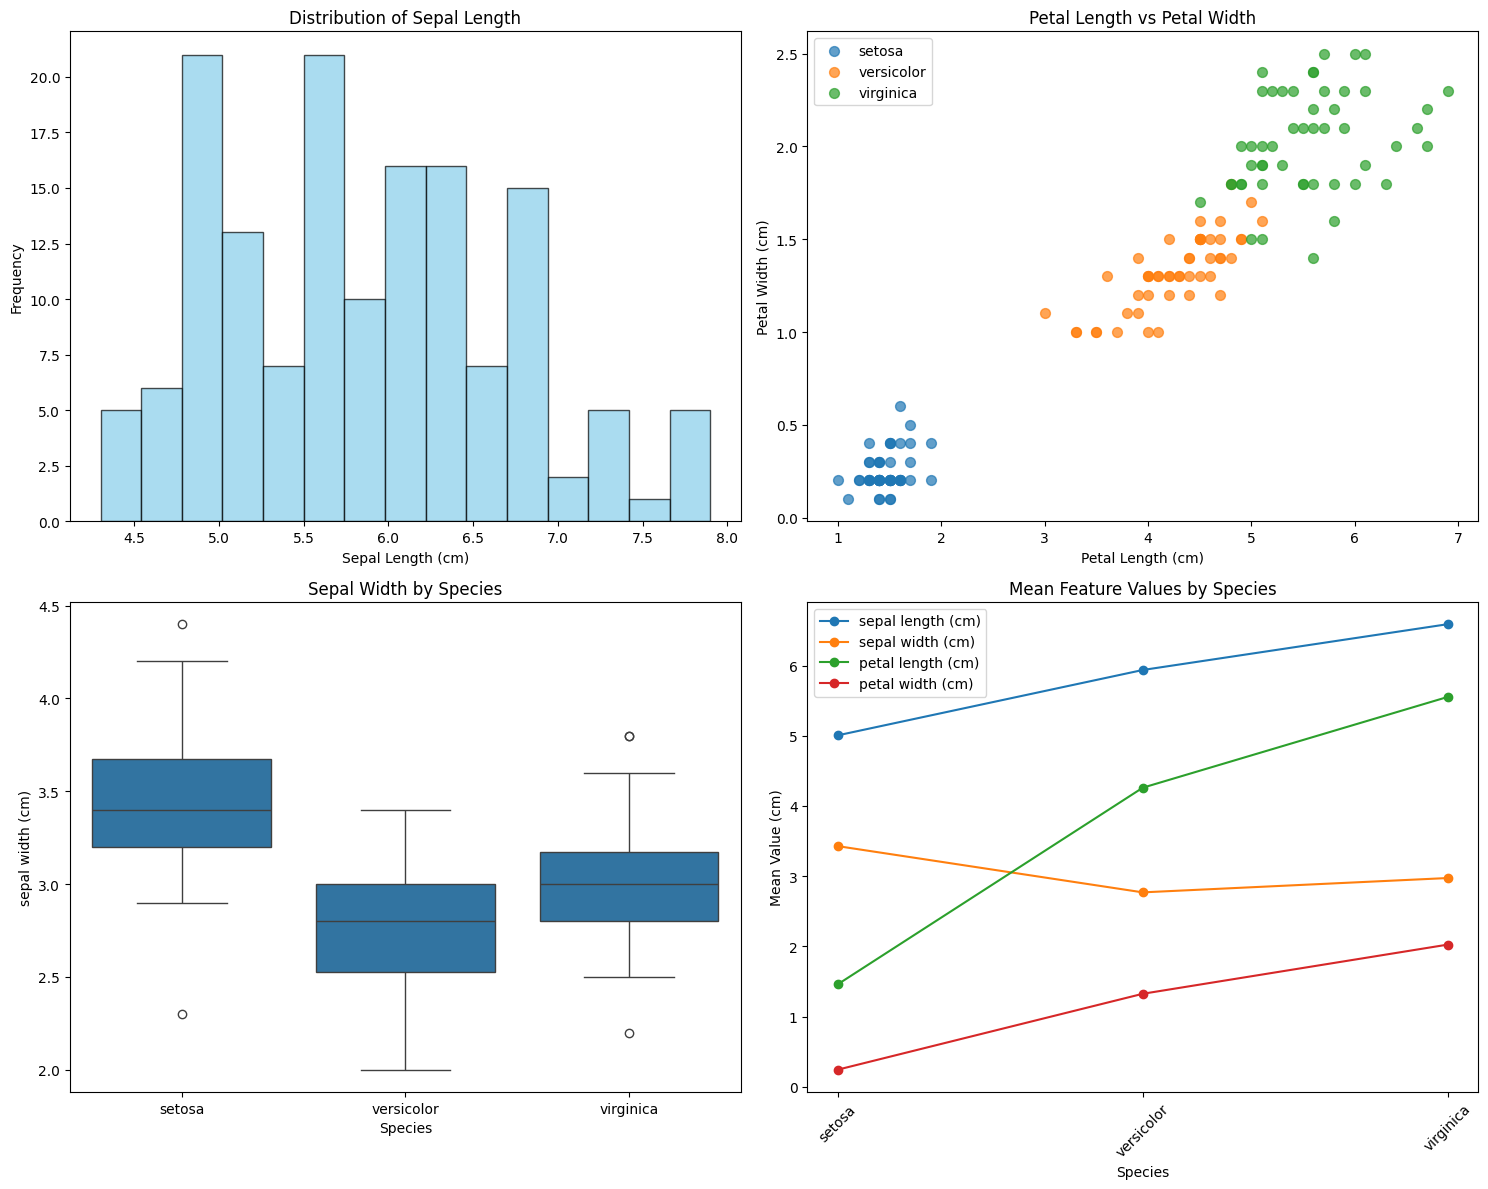

In [230]:
# Answer
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogram of sepal length
axes[0,0].hist(iris_df['sepal length (cm)'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].set_xlabel('Sepal Length (cm)')
axes[0,0].set_ylabel('Frequency')

# 2. Scatter plot
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species in iris_df['species_name'].unique():
    species_data = iris_df[iris_df['species_name'] == species]
    axes[0,1].scatter(species_data['petal length (cm)'], 
                     species_data['petal width (cm)'], 
                     label=species, alpha=0.7, s=50)
axes[0,1].set_title('Petal Length vs Petal Width')
axes[0,1].set_xlabel('Petal Length (cm)')
axes[0,1].set_ylabel('Petal Width (cm)')
axes[0,1].legend()

# 3. Box plot
sns.boxplot(x='species_name', y='sepal width (cm)', data=iris_df, ax=axes[1,0])
axes[1,0].set_title('Sepal Width by Species')
axes[1,0].set_xlabel('Species')

# 4. Line plot of means
feature_means = iris_df.groupby('species_name').mean()
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for feature in features:
    axes[1,1].plot(feature_means.index, feature_means[feature], marker='o', label=feature)
axes[1,1].set_title('Mean Feature Values by Species')
axes[1,1].set_xlabel('Species')
axes[1,1].set_ylabel('Mean Value (cm)')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Q7(g): Advanced - Interactive Range Plot with Percentiles
Question: Create a range plot showing 25th-75th percentile ranges for each feature by species, with median lines.

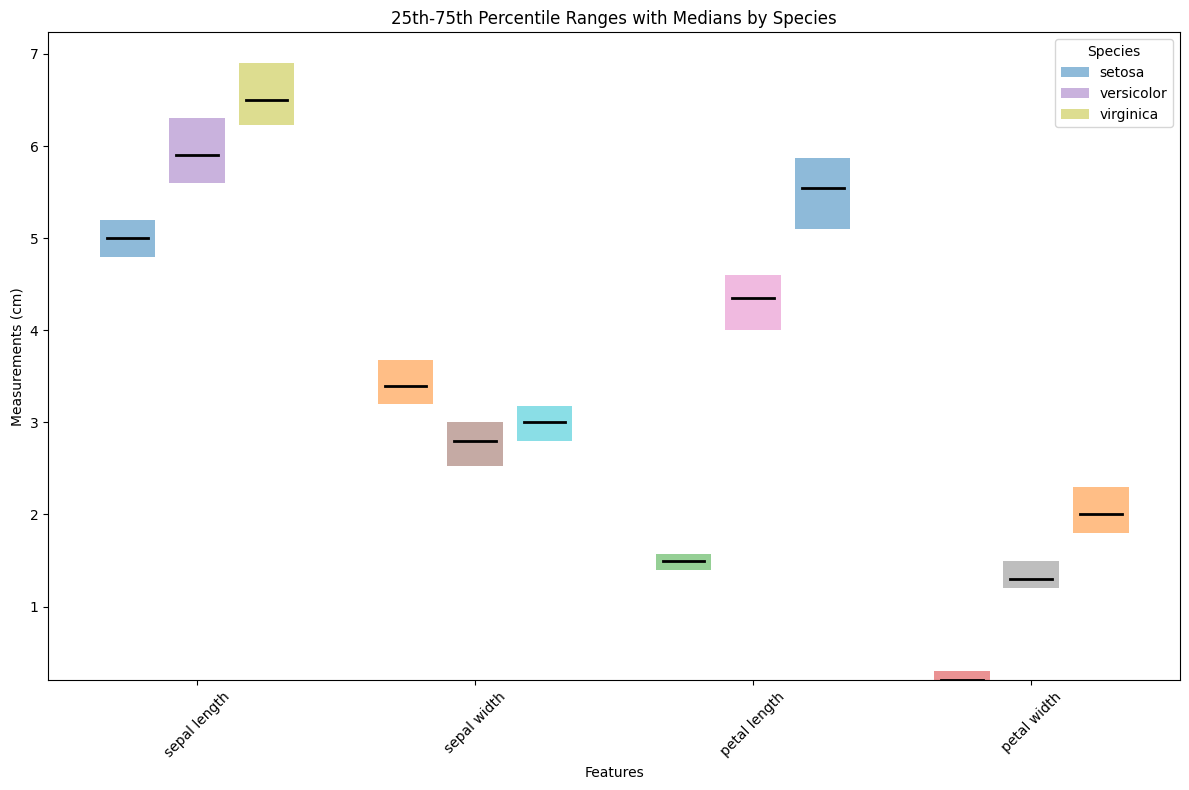

Key Insights:
1. Setosa has smallest measurements and least variability
2. Virginica shows largest measurements for petal features
3. Versicolor is intermediate but closer to virginica


In [231]:
# Calculate statistics for each species
species_stats = {}
for species in iris_df['species_name'].unique():
    species_data = iris_df[iris_df['species_name'] == species]
    stats = species_data.iloc[:, :4].describe().loc[['25%', '50%', '75%']]
    species_stats[species] = stats

# Create the range plot
fig, ax = plt.subplots(figsize=(12, 8))
features = iris_df.columns[:4]
x_pos = np.arange(len(features))
bar_width = 0.25

for i, species in enumerate(iris_df['species_name'].unique()):
    stats = species_stats[species]
    # Plot percentile ranges
    for j, feature in enumerate(features):
        lower = stats.loc['25%', feature]
        upper = stats.loc['75%', feature]
        median = stats.loc['50%', feature]
        
        # Plot range bar
        ax.bar(x_pos[j] + i*bar_width, upper-lower, bottom=lower, 
               width=bar_width*0.8, alpha=0.5, label=species if j == 0 else "")
        
        # Plot median line
        ax.plot([x_pos[j] + i*bar_width - bar_width*0.3, 
                 x_pos[j] + i*bar_width + bar_width*0.3], 
                [median, median], color='black', linewidth=2)

ax.set_xlabel('Features')
ax.set_ylabel('Measurements (cm)')
ax.set_title('25th-75th Percentile Ranges with Medians by Species')
ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels([f.replace(' (cm)', '') for f in features])
ax.legend(title='Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretation
print("Key Insights:")
print("1. Setosa has smallest measurements and least variability")
print("2. Virginica shows largest measurements for petal features")
print("3. Versicolor is intermediate but closer to virginica")

### Q8: Probability of Range
Question: Using wine dataset, find probability that alcohol content is greater than 13.5.

In [232]:
import numpy as np
import scipy.stats as st # <-- Use a different alias like 'st'
from sklearn.datasets import load_wine

# Now your code will work perfectly, regardless of what other variables are named.
wine = load_wine()
alcohol = wine.data[:, 0]
mean, std = np.mean(alcohol), np.std(alcohol)

# Use the new alias 'st' to call the function
prob = 1 - st.norm.cdf(13.5, loc=mean, scale=std)

print(f"Mean: {mean:.2f}, Std Dev: {std:.2f}")
print(f"P(Alcohol > 13.5): {prob:.4f}")

Mean: 13.00, Std Dev: 0.81
P(Alcohol > 13.5): 0.2687


### Q9: Multiple Binomial Probabilities
Question: For a 60% accurate model, find probabilities of getting 8, 9, or 10 correct out of 10 predictions.

In [233]:
n, p = 10, 0.6
for k in [8, 9, 10]:
    prob = binom.pmf(k, n, p)
    print(f"P({k} correct): {prob:.4f}")

P(8 correct): 0.1209
P(9 correct): 0.0403
P(10 correct): 0.0060


### Q10: Poisson Cumulative Probability
Question: If calls come at 5 per hour, find probability of receiving 3 or fewer calls.

In [234]:
rate = 5
prob = poisson.cdf(3, rate)
print(f"P(≤3 calls): {prob:.4f}")

P(≤3 calls): 0.2650


### Q11: Compare Two Groups
Question: Test if mean alcohol content is different between wine class 0 and class 1.

In [235]:
from scipy import stats
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['class'] = wine.target

# Extract alcohol values for class 0 and class 1
class0 = wine_df[wine_df['class'] == 0]['alcohol']
class1 = wine_df[wine_df['class'] == 1]['alcohol']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(class0, class1)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
print("Significant difference" if p_value < 0.05 else "No significant difference")


T-statistic: 16.4786, P-value: 0.0000
Significant difference


### Q12: Normal Distribution Percentiles
Question: Find the sepal length value at 25th, 50th, and 75th percentiles.

In [236]:
sepal_length = iris.data[:, 0]
p25, p50, p75 = np.percentile(sepal_length, [25, 50, 75])
print(f"25th percentile: {p25:.2f}")
print(f"50th percentile: {p50:.2f}") 
print(f"75th percentile: {p75:.2f}")

25th percentile: 5.10
50th percentile: 5.80
75th percentile: 6.40


### Q13: Probability of Success
Question: If surgery success rate is 85%, what's probability of at least 8 successes in 10 surgeries?

In [237]:
from scipy.stats import binom, poisson

# Given values
n = 200       # total items
p = 0.02      # defect probability
k = 5         # number of defective items

# --- Binomial probability ---
prob_binom = binom.pmf(k, n, p)

# --- Poisson approximation ---
lam = n * p
prob_poisson = poisson.pmf(k, lam)

print(f"Binomial P(X=5): {prob_binom:.6f}")
print(f"Poisson Approx P(X=5): {prob_poisson:.6f}")

Binomial P(X=5): 0.157879
Poisson Approx P(X=5): 0.156293


### Q14: Correlation Test
Question: Check if there's correlation between sepal length and sepal width in iris dataset.

In [238]:
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Select the two columns
sepal_length = df['sepal length (cm)']
sepal_width = df['sepal width (cm)']

# Compute Pearson correlation
correlation, p_value = stats.pearsonr(sepal_length, sepal_width)

print(f"Correlation: {correlation:.3f}, P-value: {p_value:.4f}")


Correlation: -0.118, P-value: 0.1519


#### Q15: Real-world Scenario
Question: A factory produces items with 2% defect rate. In a batch of 200 items, what's probability of finding exactly 5 defective items?

In [239]:
# Using Binomial
n, p = 200, 0.02
prob_binomial = binom.pmf(5, n, p)

# Using Poisson approximation
rate = n * p
prob_poisson = poisson.pmf(5, rate)

print(f"Binomial: {prob_binomial:.4f}")
print(f"Poisson approx: {prob_poisson:.4f}")

Binomial: 0.1579
Poisson approx: 0.1563
